In [1]:
!pip install ultralytics


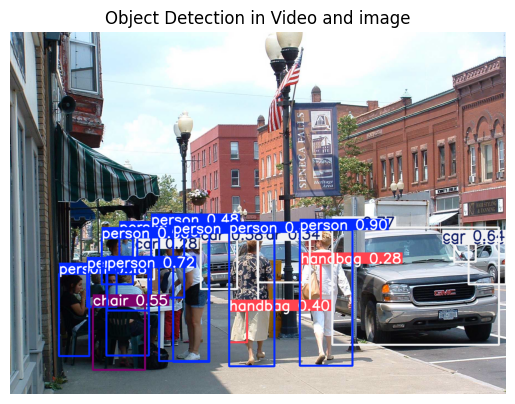

In [5]:
import cv2
from ultralytics import YOLO
from google.colab import files
import numpy as np
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import time

# Step 2: Upload Video File
uploaded = files.upload()

# Assuming only one file is uploaded and retrieving its filename
video_filename = next(iter(uploaded))

# Step 3: Load YOLOv8 Pretrained Model
model = YOLO('yolov8n.pt')  # You can use 'yolov8n.pt' or any other variant

# Step 4: Open the Uploaded Video File
cap = cv2.VideoCapture(video_filename)

# Get the video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Title for the display
title = "Object Detection in Video and image"

# Step 5: Run Object Detection and Display Results
frame_skip = 20  # Skip every N frames to speed up display
frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Detect objects
    results = model(frame)

    # Plot boxes and labels on the image
    annotated_frame = results[0].plot()

    # Convert annotated_frame to RGB (from BGR)
    annotated_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

    # Display the frame every `frame_skip` frames
    if frame_count % frame_skip == 0:
        # Clear the previous output and display the current frame
        clear_output(wait=True)
        plt.imshow(annotated_frame)
        plt.title(title)  # Set the title for the plot
        plt.axis('off')
        plt.show()

    frame_count += 1
    time.sleep(1 / fps)  # This keeps the loop closer to the original frame rate

cap.release()
